# Download Dataset

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
!gunzip train-images-idx3-ubyte.gz
!gunzip train-labels-idx1-ubyte.gz
!gunzip t10k-labels-idx1-ubyte.gz
!gunzip t10k-images-idx3-ubyte.gz

--2022-12-09 06:33:22--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  52.1MB/s    in 0.2s    

2022-12-09 06:33:23 (52.1 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-12-09 06:33:23--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[=========

In [ ]:
!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=2a614ff2e93ec63d34d5465e05c28753c80656f9a7d90ab38d621a703290addc
  Stored in directory: /root/.cache/pip/wheels/27/40/a8/6447ee4a00cb87e2084e1ef1df5c38433720cc1090be082842
Successfully built idx2numpy


# Import Libraries

In [ ]:
import idx2numpy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score ,confusion_matrix
import seaborn as sns
import pandas as pd

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid
import torchvision
import torchvision.transforms as transforms


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [ ]:
if torch.cuda.is_available():
    print('use',torch.device('cuda'))
else:
    print('use',torch.device('cpu'))


use cuda


# Preprocess data

In [ ]:
# import Train dataset as Array
X_train_3D = idx2numpy.convert_from_file('train-images-idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784).astype(np.float32)
Y_train = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
Y_train=Y_train.reshape(60000,1)

# import Test dataset as Array
X_test_3D = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
X_test = X_test_3D.flatten().reshape(10000,784).astype(np.float32)
Y_test = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

In [ ]:
# make Train & validation set
train_images, val_images, train_labels, val_labels = train_test_split(X_train, Y_train, stratify=Y_train,
                                                                      random_state= 231,test_size=0.20)
test_images = X_test
test_labels = Y_test

In [ ]:
# Reshape for plot
train_images = train_images.reshape(train_images.shape[0], 28, 28)
val_images = val_images.reshape(val_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

train_labels = train_labels.squeeze()
val_labels = val_labels.squeeze()

In [ ]:
print(train_images.shape,val_images.shape,test_images.shape)
print(train_labels.shape,val_labels.shape,test_labels.shape)

(48000, 28, 28) (12000, 28, 28) (10000, 28, 28)
(48000,) (12000,) (10000,)


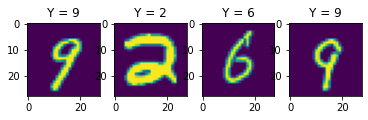

In [ ]:
for i in range(1,5):
  plt.subplot(140 + i)
  plt.imshow(train_images[i].squeeze())
  plt.title("Y = %d" %(train_labels[i]))

# Make *DataLoader*

In [ ]:
# prepare dataset for torch
train_images_tensor = torch.tensor(train_images)/255.0
train_labels_tensor = torch.tensor(train_labels)
train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)
train_loader = DataLoader(train_tensor, batch_size=16, num_workers=2, shuffle=True)

val_images_tensor = torch.tensor(val_images)/255.0
val_labels_tensor = torch.tensor(val_labels)
val_tensor = TensorDataset(val_images_tensor, val_labels_tensor)
val_loader =   DataLoader(val_tensor, batch_size=16, num_workers=2, shuffle=True)

test_images_tensor = torch.tensor(test_images)/255.0
test_labels_tensor = torch.tensor(test_labels)
test_tensor = TensorDataset(test_images_tensor, test_labels_tensor)
test_loader = DataLoader(test_tensor, batch_size=16, num_workers=2, shuffle=False)

In [ ]:
for i, (data, label) in enumerate(train_loader):
    img_grid = make_grid(data[0:8,].unsqueeze(1), nrow=8)
    img_target_labels = label[0:8,].numpy().reshape(1,8)
    break


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


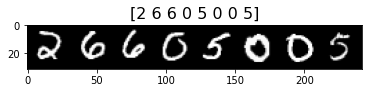

In [ ]:
plt.imshow(img_grid.numpy().transpose((1,2,0)))
plt.rcParams['figure.figsize'] = (10,2)
plt.title(img_target_labels[0,:], size=16)
plt.show()

# Making Network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.linear_block = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 10),
        )
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.linear_block(x)
        return x

In [ ]:
ann_model = Net()
if torch.cuda.is_available():
    ann_model = ann_model.cuda()
ann_model

Net(
  (linear_block): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=256, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.1, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

## adding optimizer

In [ ]:
optimizer = optim.Adam(params=ann_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

if torch.cuda.is_available():
    criterion = criterion.cuda()

In [ ]:
def train_model(model,train_loader,num_epoch):
    model.train()
    exp_lr_scheduler.step()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.unsqueeze(1)
        data, target = data, target
        
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
            
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if (batch_idx + 1)% 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                num_epoch, (batch_idx + 1) * len(data), len(train_loader.dataset),
                100. * (batch_idx + 1) / len(train_loader), loss.data))
            
def evaluate(model,data_loader):
    model.eval()
    loss = 0
    acc = 0
    correct = 0
    
    for data, target in data_loader:
        data = data.unsqueeze(1)
        data, target = data, target
        
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)
        
        loss += F.cross_entropy(output, target, size_average=False).data

        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        
    loss /= len(data_loader.dataset)
        
    print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(
        loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    acc = 100. * correct / len(data_loader.dataset)
    return loss.cpu(), acc.cpu()

In [ ]:
def get_output(model, loader, with_prob=True):
    y_pred, y_true, = [], []
    loss = 0
    correct = 0
    if with_prob:
        y_prob = []
    else:
        y_prob = None
    for inputs, labels in loader:
        if torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
        outputs = model(inputs)
        loss += F.cross_entropy(outputs, labels, size_average=False).data
        _, preds = torch.max(outputs, 1)
        if with_prob:
            probs = torch.nn.functional.softmax(outputs, dim=1)
        else:
            probs = None
        y_pred.append(preds.cpu().numpy())
        y_true.append(labels.cpu().numpy())
        if with_prob:
            y_prob.append(probs.detach().cpu().numpy())

        correct += preds.eq(labels.data.view_as(preds)).cpu().sum()

    loss /= len(loader.dataset)
    print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(
        loss, correct, len(loader.dataset),
        100. * correct / len(loader.dataset)))
    y_pred = np.concatenate(y_pred)
    y_true = np.concatenate(y_true)
    if with_prob:
        y_prob = np.concatenate(y_prob)
    return y_pred, y_true, y_prob

In [ ]:
num_epochs = 30
loss_per_epoch = np.array([])
acc_per_epoch = np.array([])
for n in range(num_epochs):
    train_model(ann_model, train_loader, n)
    lpe,ape = evaluate(ann_model, val_loader)
    loss_per_epoch = np.append(loss_per_epoch,lpe)
    acc_per_epoch = np.append(acc_per_epoch,ape)

Train Epoch: 0 [1600/48000 (3%)]	Loss: 1.107208
Train Epoch: 0 [3200/48000 (7%)]	Loss: 0.351183
Train Epoch: 0 [4800/48000 (10%)]	Loss: 0.179464
Train Epoch: 0 [6400/48000 (13%)]	Loss: 0.725904
Train Epoch: 0 [8000/48000 (17%)]	Loss: 0.182440
Train Epoch: 0 [9600/48000 (20%)]	Loss: 0.173670
Train Epoch: 0 [11200/48000 (23%)]	Loss: 0.772373
Train Epoch: 0 [12800/48000 (27%)]	Loss: 0.683052
Train Epoch: 0 [14400/48000 (30%)]	Loss: 0.089070
Train Epoch: 0 [16000/48000 (33%)]	Loss: 0.134856
Train Epoch: 0 [17600/48000 (37%)]	Loss: 0.309469
Train Epoch: 0 [19200/48000 (40%)]	Loss: 0.334960
Train Epoch: 0 [20800/48000 (43%)]	Loss: 0.405626
Train Epoch: 0 [22400/48000 (47%)]	Loss: 0.187258
Train Epoch: 0 [24000/48000 (50%)]	Loss: 0.170916
Train Epoch: 0 [25600/48000 (53%)]	Loss: 0.506476
Train Epoch: 0 [27200/48000 (57%)]	Loss: 0.341369
Train Epoch: 0 [28800/48000 (60%)]	Loss: 0.401906
Train Epoch: 0 [30400/48000 (63%)]	Loss: 0.587576
Train Epoch: 0 [32000/48000 (67%)]	Loss: 0.663676
Train Ep

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process



Average Val Loss: 0.1573, Val Accuracy: 11629/12000 (96.908%)

Train Epoch: 14 [1600/48000 (3%)]	Loss: 0.025292


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>Traceback (most recent call last):

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
self._shutdown_workers()    self._shutdown_workers()

Train Epoch: 14 [3200/48000 (7%)]	Loss: 0.111462




  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive

  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a child process'
assert self._parent_pid == os.getpid(), 'can only test a child process'AssertionError: can only test a child process

AssertionError: can only test a child process


Train Epoch: 14 [4800/48000 (10%)]	Loss: 0.012499
Train Epoch: 14 [6400/48000 (13%)]	Loss: 0.032099
Train Epoch: 14 [8000/48000 (17%)]	Loss: 0.089199
Train Epoch: 14 [9600/48000 (20%)]	Loss: 0.035625
Train Epoch: 14 [11200/48000 (23%)]	Loss: 0.300765
Train Epoch: 14 [12800/48000 (27%)]	Loss: 0.125246
Train Epoch: 14 [14400/48000 (30%)]	Loss: 0.000001
Train Epoch: 14 [16000/48000 (33%)]	Loss: 0.011391
Train Epoch: 14 [17600/48000 (37%)]	Loss: 0.079443
Train Epoch: 14 [19200/48000 (40%)]	Loss: 0.133361
Train Epoch: 14 [20800/48000 (43%)]	Loss: 0.031090
Train Epoch: 14 [22400/48000 (47%)]	Loss: 0.000632
Train Epoch: 14 [24000/48000 (50%)]	Loss: 0.021146
Train Epoch: 14 [25600/48000 (53%)]	Loss: 0.002297
Train Epoch: 14 [27200/48000 (57%)]	Loss: 0.022995
Train Epoch: 14 [28800/48000 (60%)]	Loss: 0.092797
Train Epoch: 14 [30400/48000 (63%)]	Loss: 0.032757
Train Epoch: 14 [32000/48000 (67%)]	Loss: 0.089723
Train Epoch: 14 [33600/48000 (70%)]	Loss: 0.004384
Train Epoch: 14 [35200/48000 (73%)]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho


Average Val Loss: 0.1576, Val Accuracy: 11632/12000 (96.933%)

Train Epoch: 15 [1600/48000 (3%)]	Loss: 0.008945


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train Epoch: 15 [3200/48000 (7%)]	Loss: 0.000040
Train Epoch: 15 [4800/48000 (10%)]	Loss: 0.200298
Train Epoch: 15 [6400/48000 (13%)]	Loss: 0.000469
Train Epoch: 15 [8000/48000 (17%)]	Loss: 0.119054
Train Epoch: 15 [9600/48000 (20%)]	Loss: 0.001292
Train Epoch: 15 [11200/48000 (23%)]	Loss: 0.147461
Train Epoch: 15 [12800/48000 (27%)]	Loss: 0.000045
Train Epoch: 15 [14400/48000 (30%)]	Loss: 0.086044
Train Epoch: 15 [16000/48000 (33%)]	Loss: 0.141659
Train Epoch: 15 [17600/48000 (37%)]	Loss: 0.001708
Train Epoch: 15 [19200/48000 (40%)]	Loss: 0.016016
Train Epoch: 15 [20800/48000 (43%)]	Loss: 0.003409
Train Epoch: 15 [22400/48000 (47%)]	Loss: 0.009029
Train Epoch: 15 [24000/48000 (50%)]	Loss: 0.001150
Train Epoch: 15 [25600/48000 (53%)]	Loss: 0.119939
Train Epoch: 15 [27200/48000 (57%)]	Loss: 0.000001
Train Epoch: 15 [28800/48000 (60%)]	Loss: 0.028495
Train Epoch: 15 [30400/48000 (63%)]	Loss: 0.000020
Train Epoch: 15 [32000/48000 (67%)]	Loss: 0.099041
Train Epoch: 15 [33600/48000 (70%)]	L

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

    Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    if w.is_alive():self._shutdown_workers()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive

    assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

    AssertionErrorif w.is_alive():
: can only test a child process
  File "/usr/lib/pytho


Average Val Loss: 0.1592, Val Accuracy: 11636/12000 (96.967%)



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    Exception ignored in: assert self._parent_pid == os.getpid(), 'can only test a child process'<function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
AssertionError
: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
can only test a child process
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train Epoch: 16 [1600/48000 (3%)]	Loss: 0.042480
Train Epoch: 16 [3200/48000 (7%)]	Loss: 0.024219
Train Epoch: 16 [4800/48000 (10%)]	Loss: 0.000865
Train Epoch: 16 [6400/48000 (13%)]	Loss: 0.063960
Train Epoch: 16 [8000/48000 (17%)]	Loss: 0.000298
Train Epoch: 16 [9600/48000 (20%)]	Loss: 0.001407
Train Epoch: 16 [11200/48000 (23%)]	Loss: 0.151236
Train Epoch: 16 [12800/48000 (27%)]	Loss: 0.001072
Train Epoch: 16 [14400/48000 (30%)]	Loss: 0.000492
Train Epoch: 16 [16000/48000 (33%)]	Loss: 0.043094
Train Epoch: 16 [17600/48000 (37%)]	Loss: 0.252749
Train Epoch: 16 [19200/48000 (40%)]	Loss: 0.055227
Train Epoch: 16 [20800/48000 (43%)]	Loss: 0.003297
Train Epoch: 16 [22400/48000 (47%)]	Loss: 0.001467
Train Epoch: 16 [24000/48000 (50%)]	Loss: 0.272046
Train Epoch: 16 [25600/48000 (53%)]	Loss: 0.000226
Train Epoch: 16 [27200/48000 (57%)]	Loss: 0.000733
Train Epoch: 16 [28800/48000 (60%)]	Loss: 0.046310
Train Epoch: 16 [30400/48000 (63%)]	Loss: 0.000126
Train Epoch: 16 [32000/48000 (67%)]	Los

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    Traceback (most recent call last):
self._shutdown_workers()  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    self._shutdown_workers()    
if w.is_alive():
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionErrorif w.is_alive():: 
  File "/usr/lib/python3.8/multiprocessing/process.p


Average Val Loss: 0.1593, Val Accuracy: 11634/12000 (96.950%)



Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10><function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
self._shutdown_workers()    
if w.is_alive():    
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
if w.is_alive():  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: 
can only test a child process  File "/usr/lib/python

Train Epoch: 17 [1600/48000 (3%)]	Loss: 0.169790
Train Epoch: 17 [3200/48000 (7%)]	Loss: 0.052624
Train Epoch: 17 [4800/48000 (10%)]	Loss: 0.058423
Train Epoch: 17 [6400/48000 (13%)]	Loss: 0.042893
Train Epoch: 17 [8000/48000 (17%)]	Loss: 0.215133
Train Epoch: 17 [9600/48000 (20%)]	Loss: 0.025293
Train Epoch: 17 [11200/48000 (23%)]	Loss: 0.058718
Train Epoch: 17 [12800/48000 (27%)]	Loss: 0.317255
Train Epoch: 17 [14400/48000 (30%)]	Loss: 0.000186
Train Epoch: 17 [16000/48000 (33%)]	Loss: 0.005752
Train Epoch: 17 [17600/48000 (37%)]	Loss: 0.097036
Train Epoch: 17 [19200/48000 (40%)]	Loss: 0.458384
Train Epoch: 17 [20800/48000 (43%)]	Loss: 0.006415
Train Epoch: 17 [22400/48000 (47%)]	Loss: 0.280731
Train Epoch: 17 [24000/48000 (50%)]	Loss: 0.005389
Train Epoch: 17 [25600/48000 (53%)]	Loss: 0.009824
Train Epoch: 17 [27200/48000 (57%)]	Loss: 0.007720
Train Epoch: 17 [28800/48000 (60%)]	Loss: 0.705323
Train Epoch: 17 [30400/48000 (63%)]	Loss: 0.058764
Train Epoch: 17 [32000/48000 (67%)]	Los

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

      File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
if w.is_alive():    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in 


Average Val Loss: 0.1575, Val Accuracy: 11639/12000 (96.992%)



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>if w.is_alive():
Traceback (most recent call last):

  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
: can only test a child process    if w.is_alive():

  File "/usr/lib/pytho

Train Epoch: 18 [1600/48000 (3%)]	Loss: 0.012327
Train Epoch: 18 [3200/48000 (7%)]	Loss: 0.148408
Train Epoch: 18 [4800/48000 (10%)]	Loss: 0.000209
Train Epoch: 18 [6400/48000 (13%)]	Loss: 0.087518
Train Epoch: 18 [8000/48000 (17%)]	Loss: 0.000751
Train Epoch: 18 [9600/48000 (20%)]	Loss: 0.169492
Train Epoch: 18 [11200/48000 (23%)]	Loss: 0.068569
Train Epoch: 18 [12800/48000 (27%)]	Loss: 0.002457
Train Epoch: 18 [14400/48000 (30%)]	Loss: 0.003904
Train Epoch: 18 [16000/48000 (33%)]	Loss: 0.033861
Train Epoch: 18 [17600/48000 (37%)]	Loss: 0.296761
Train Epoch: 18 [19200/48000 (40%)]	Loss: 0.002128
Train Epoch: 18 [20800/48000 (43%)]	Loss: 0.003907
Train Epoch: 18 [22400/48000 (47%)]	Loss: 0.136153
Train Epoch: 18 [24000/48000 (50%)]	Loss: 0.072961
Train Epoch: 18 [25600/48000 (53%)]	Loss: 0.000003
Train Epoch: 18 [27200/48000 (57%)]	Loss: 0.002197
Train Epoch: 18 [28800/48000 (60%)]	Loss: 0.063527
Train Epoch: 18 [30400/48000 (63%)]	Loss: 0.007717
Train Epoch: 18 [32000/48000 (67%)]	Los

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10><function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
self._shutdown_workers()    

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
assert self._parent_pid == os.getpid(), 'can only test a child process'    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

    if w.is_alive():AssertionError
  File "/usr/lib/python3.8/multiprocessing/process.py"


Average Val Loss: 0.1581, Val Accuracy: 11641/12000 (97.008%)



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a child process'
self._shutdown_workers()AssertionError: can only test a child process

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train Epoch: 19 [1600/48000 (3%)]	Loss: 0.001958
Train Epoch: 19 [3200/48000 (7%)]	Loss: 0.000760
Train Epoch: 19 [4800/48000 (10%)]	Loss: 0.045410
Train Epoch: 19 [6400/48000 (13%)]	Loss: 0.411426
Train Epoch: 19 [8000/48000 (17%)]	Loss: 0.773609
Train Epoch: 19 [9600/48000 (20%)]	Loss: 0.014486
Train Epoch: 19 [11200/48000 (23%)]	Loss: 0.011299
Train Epoch: 19 [12800/48000 (27%)]	Loss: 0.146078
Train Epoch: 19 [14400/48000 (30%)]	Loss: 0.001373
Train Epoch: 19 [16000/48000 (33%)]	Loss: 0.267520
Train Epoch: 19 [17600/48000 (37%)]	Loss: 0.449978
Train Epoch: 19 [19200/48000 (40%)]	Loss: 0.040267
Train Epoch: 19 [20800/48000 (43%)]	Loss: 0.000204
Train Epoch: 19 [22400/48000 (47%)]	Loss: 0.000795
Train Epoch: 19 [24000/48000 (50%)]	Loss: 0.006852
Train Epoch: 19 [25600/48000 (53%)]	Loss: 0.233273
Train Epoch: 19 [27200/48000 (57%)]	Loss: 0.020518
Train Epoch: 19 [28800/48000 (60%)]	Loss: 0.285721
Train Epoch: 19 [30400/48000 (63%)]	Loss: 0.017006
Train Epoch: 19 [32000/48000 (67%)]	Los

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>Traceback (most recent call last):

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho


Average Val Loss: 0.1590, Val Accuracy: 11648/12000 (97.067%)



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>if w.is_alive():

  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
Traceback (most recent call last):
      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
assert self._parent_pid == os.getpid(), 'can only test a child process'    self._shutdown_workers()

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
AssertionError    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py"

Train Epoch: 20 [1600/48000 (3%)]	Loss: 0.004541
Train Epoch: 20 [3200/48000 (7%)]	Loss: 0.466511
Train Epoch: 20 [4800/48000 (10%)]	Loss: 0.000236
Train Epoch: 20 [6400/48000 (13%)]	Loss: 0.047126
Train Epoch: 20 [8000/48000 (17%)]	Loss: 0.000451
Train Epoch: 20 [9600/48000 (20%)]	Loss: 0.001964
Train Epoch: 20 [11200/48000 (23%)]	Loss: 0.004802
Train Epoch: 20 [12800/48000 (27%)]	Loss: 0.002132
Train Epoch: 20 [14400/48000 (30%)]	Loss: 0.135153
Train Epoch: 20 [16000/48000 (33%)]	Loss: 0.000215
Train Epoch: 20 [17600/48000 (37%)]	Loss: 0.000029
Train Epoch: 20 [19200/48000 (40%)]	Loss: 0.011023
Train Epoch: 20 [20800/48000 (43%)]	Loss: 0.082584
Train Epoch: 20 [22400/48000 (47%)]	Loss: 0.003380
Train Epoch: 20 [24000/48000 (50%)]	Loss: 0.001500
Train Epoch: 20 [25600/48000 (53%)]	Loss: 0.211039
Train Epoch: 20 [27200/48000 (57%)]	Loss: 0.000179
Train Epoch: 20 [28800/48000 (60%)]	Loss: 0.059931
Train Epoch: 20 [30400/48000 (63%)]	Loss: 0.000014
Train Epoch: 20 [32000/48000 (67%)]	Los

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho


Average Val Loss: 0.1587, Val Accuracy: 11647/12000 (97.058%)



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

    self._shutdown_workers()      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train Epoch: 21 [1600/48000 (3%)]	Loss: 0.000603
Train Epoch: 21 [3200/48000 (7%)]	Loss: 0.166074
Train Epoch: 21 [4800/48000 (10%)]	Loss: 0.117487
Train Epoch: 21 [6400/48000 (13%)]	Loss: 0.004553
Train Epoch: 21 [8000/48000 (17%)]	Loss: 0.209635
Train Epoch: 21 [9600/48000 (20%)]	Loss: 0.020966
Train Epoch: 21 [11200/48000 (23%)]	Loss: 0.057900
Train Epoch: 21 [12800/48000 (27%)]	Loss: 0.013592
Train Epoch: 21 [14400/48000 (30%)]	Loss: 0.093454
Train Epoch: 21 [16000/48000 (33%)]	Loss: 0.022651
Train Epoch: 21 [17600/48000 (37%)]	Loss: 0.021355
Train Epoch: 21 [19200/48000 (40%)]	Loss: 0.056359
Train Epoch: 21 [20800/48000 (43%)]	Loss: 0.063137
Train Epoch: 21 [22400/48000 (47%)]	Loss: 0.058458
Train Epoch: 21 [24000/48000 (50%)]	Loss: 0.001304
Train Epoch: 21 [25600/48000 (53%)]	Loss: 0.010084
Train Epoch: 21 [27200/48000 (57%)]	Loss: 0.010003
Train Epoch: 21 [28800/48000 (60%)]	Loss: 0.014891
Train Epoch: 21 [30400/48000 (63%)]	Loss: 0.079125
Train Epoch: 21 [32000/48000 (67%)]	Los

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child processException ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho


Average Val Loss: 0.1585, Val Accuracy: 11649/12000 (97.075%)



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

    Traceback (most recent call last):
if w.is_alive():  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

      File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
self._shutdown_workers()
    assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

AssertionError: can only test a child process    
if w.is_alive():
  File "/usr/lib/pytho

Train Epoch: 22 [1600/48000 (3%)]	Loss: 0.000005
Train Epoch: 22 [3200/48000 (7%)]	Loss: 0.006601
Train Epoch: 22 [4800/48000 (10%)]	Loss: 0.092872
Train Epoch: 22 [6400/48000 (13%)]	Loss: 0.000074
Train Epoch: 22 [8000/48000 (17%)]	Loss: 0.000004
Train Epoch: 22 [9600/48000 (20%)]	Loss: 0.070676
Train Epoch: 22 [11200/48000 (23%)]	Loss: 0.041270
Train Epoch: 22 [12800/48000 (27%)]	Loss: 0.178429
Train Epoch: 22 [14400/48000 (30%)]	Loss: 0.351986
Train Epoch: 22 [16000/48000 (33%)]	Loss: 0.022914
Train Epoch: 22 [17600/48000 (37%)]	Loss: 0.010236
Train Epoch: 22 [19200/48000 (40%)]	Loss: 0.047826
Train Epoch: 22 [20800/48000 (43%)]	Loss: 0.023088
Train Epoch: 22 [22400/48000 (47%)]	Loss: 0.028962
Train Epoch: 22 [24000/48000 (50%)]	Loss: 0.000471
Train Epoch: 22 [25600/48000 (53%)]	Loss: 0.052369
Train Epoch: 22 [27200/48000 (57%)]	Loss: 0.210714
Train Epoch: 22 [28800/48000 (60%)]	Loss: 0.014064
Train Epoch: 22 [30400/48000 (63%)]	Loss: 0.019138
Train Epoch: 22 [32000/48000 (67%)]	Los

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    Exception ignored in: assert self._parent_pid == os.getpid(), 'can only test a child process'
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>AssertionError
: Traceback (most recent call last):
can only test a child process  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    
self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho


Average Val Loss: 0.1585, Val Accuracy: 11649/12000 (97.075%)



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>    if w.is_alive():

  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
Traceback (most recent call last):
      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    assert self._parent_pid == os.getpid(), 'can only test a child process'self._shutdown_workers()

AssertionError:   File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    can only test a child processif w.is_alive():

  File "/usr/lib/pytho

Train Epoch: 23 [1600/48000 (3%)]	Loss: 0.201572
Train Epoch: 23 [3200/48000 (7%)]	Loss: 0.059789
Train Epoch: 23 [4800/48000 (10%)]	Loss: 0.075795
Train Epoch: 23 [6400/48000 (13%)]	Loss: 0.000651
Train Epoch: 23 [8000/48000 (17%)]	Loss: 0.151075
Train Epoch: 23 [9600/48000 (20%)]	Loss: 0.001721
Train Epoch: 23 [11200/48000 (23%)]	Loss: 0.186335
Train Epoch: 23 [12800/48000 (27%)]	Loss: 0.001440
Train Epoch: 23 [14400/48000 (30%)]	Loss: 0.000330
Train Epoch: 23 [16000/48000 (33%)]	Loss: 0.022506
Train Epoch: 23 [17600/48000 (37%)]	Loss: 0.521385
Train Epoch: 23 [19200/48000 (40%)]	Loss: 0.108442
Train Epoch: 23 [20800/48000 (43%)]	Loss: 0.018563
Train Epoch: 23 [22400/48000 (47%)]	Loss: 0.224300
Train Epoch: 23 [24000/48000 (50%)]	Loss: 0.000037
Train Epoch: 23 [25600/48000 (53%)]	Loss: 0.004394
Train Epoch: 23 [27200/48000 (57%)]	Loss: 0.000763
Train Epoch: 23 [28800/48000 (60%)]	Loss: 0.000949
Train Epoch: 23 [30400/48000 (63%)]	Loss: 0.266047
Train Epoch: 23 [32000/48000 (67%)]	Los

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Exception ignored in:     self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
        assert self._parent_pid == os.getpid(), 'can only test a c


Average Val Loss: 0.1587, Val Accuracy: 11647/12000 (97.058%)



Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10><function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():self._shutdown_workers()

  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a c

Train Epoch: 24 [1600/48000 (3%)]	Loss: 0.000267
Train Epoch: 24 [3200/48000 (7%)]	Loss: 0.053079
Train Epoch: 24 [4800/48000 (10%)]	Loss: 0.008852
Train Epoch: 24 [6400/48000 (13%)]	Loss: 0.085737
Train Epoch: 24 [8000/48000 (17%)]	Loss: 0.016579
Train Epoch: 24 [9600/48000 (20%)]	Loss: 0.017780
Train Epoch: 24 [11200/48000 (23%)]	Loss: 0.000649
Train Epoch: 24 [12800/48000 (27%)]	Loss: 0.056658
Train Epoch: 24 [14400/48000 (30%)]	Loss: 0.088272
Train Epoch: 24 [16000/48000 (33%)]	Loss: 0.217007
Train Epoch: 24 [17600/48000 (37%)]	Loss: 0.106007
Train Epoch: 24 [19200/48000 (40%)]	Loss: 0.211495
Train Epoch: 24 [20800/48000 (43%)]	Loss: 0.030758
Train Epoch: 24 [22400/48000 (47%)]	Loss: 0.080135
Train Epoch: 24 [24000/48000 (50%)]	Loss: 0.001699
Train Epoch: 24 [25600/48000 (53%)]	Loss: 0.180781
Train Epoch: 24 [27200/48000 (57%)]	Loss: 0.084152
Train Epoch: 24 [28800/48000 (60%)]	Loss: 0.047755
Train Epoch: 24 [30400/48000 (63%)]	Loss: 0.149329
Train Epoch: 24 [32000/48000 (67%)]	Los

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>Exception ignored in: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>    
self._shutdown_workers()Traceback (most recent call last):

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        self._shutdown_workers()if w.is_alive():

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
      File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    if w.is_alive():
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in 


Average Val Loss: 0.1588, Val Accuracy: 11648/12000 (97.067%)



Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10><function _MultiProcessingDataLoaderIter.__del__ at 0x7fec2827cc10>

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
self._shutdown_workers()    
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():self._shutdown_workers()

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
        
assert self._parent_pid == os.getpid(), 'can only test a 

Train Epoch: 25 [1600/48000 (3%)]	Loss: 0.009639
Train Epoch: 25 [3200/48000 (7%)]	Loss: 0.048558
Train Epoch: 25 [4800/48000 (10%)]	Loss: 0.001600
Train Epoch: 25 [6400/48000 (13%)]	Loss: 0.001429
Train Epoch: 25 [8000/48000 (17%)]	Loss: 0.016854
Train Epoch: 25 [9600/48000 (20%)]	Loss: 0.511077
Train Epoch: 25 [11200/48000 (23%)]	Loss: 0.000057
Train Epoch: 25 [12800/48000 (27%)]	Loss: 0.305006
Train Epoch: 25 [14400/48000 (30%)]	Loss: 0.000985
Train Epoch: 25 [16000/48000 (33%)]	Loss: 0.000520
Train Epoch: 25 [17600/48000 (37%)]	Loss: 0.059772
Train Epoch: 25 [19200/48000 (40%)]	Loss: 0.141041
Train Epoch: 25 [20800/48000 (43%)]	Loss: 0.234129
Train Epoch: 25 [22400/48000 (47%)]	Loss: 0.003268
Train Epoch: 25 [24000/48000 (50%)]	Loss: 0.098571
Train Epoch: 25 [25600/48000 (53%)]	Loss: 0.086989
Train Epoch: 25 [27200/48000 (57%)]	Loss: 0.078730
Train Epoch: 25 [28800/48000 (60%)]	Loss: 0.123965
Train Epoch: 25 [30400/48000 (63%)]	Loss: 0.157350
Train Epoch: 25 [32000/48000 (67%)]	Los

Text(0, 0.5, 'Loss')

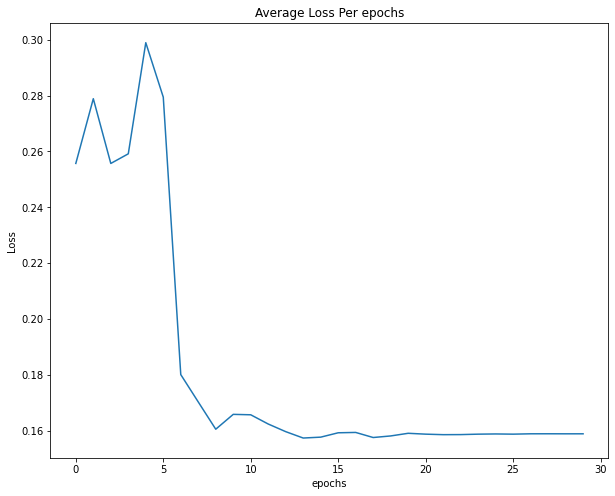

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.plot(range(num_epochs),loss_per_epoch)
plt.title('Average Loss Per epochs')
plt.xlabel("epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

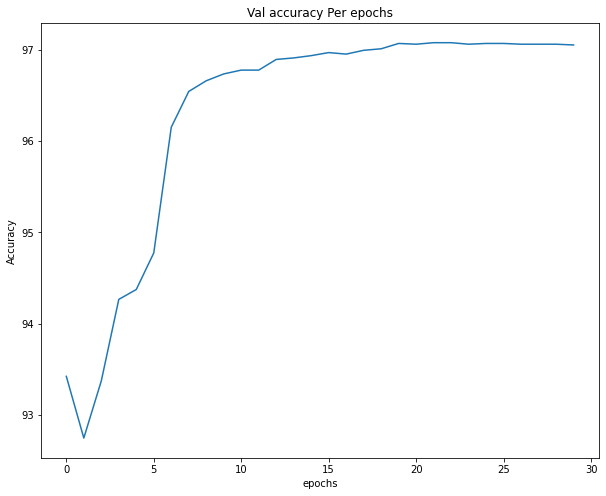

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.plot(range(num_epochs),acc_per_epoch)
plt.title('Val accuracy Per epochs')
plt.xlabel("epochs")
plt.ylabel("Accuracy")

In [ ]:
y_pred, y_true, y_prob = get_output(ann_model,test_loader)

/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Val Loss: 0.1437, Val Accuracy: 9733/10000 (97.330%)



In [ ]:
# Make the confusion matrix
def confusion_plot(y_test,y_pred):
    cmt = confusion_matrix(y_test,y_pred)
    plt.rcParams['figure.figsize'] = (10,8)
    sns.heatmap(cmt,fmt='',annot=True,linewidth=0.01,cmap=sns.cubehelix_palette(as_cmap=True))
    plt.title("confusion matrix heat map")
    plt.xlabel("predicted")
    plt.ylabel("true")
    plt.show()


# generate classification report
def generate_classification_report(y_test,y_pred):
    report=pd.DataFrame.from_dict(classification_report(y_pred,y_test,output_dict=True)).T
    report['Label']=[i  if x.isdigit() else " " for i,x in enumerate(report.index)]
    report=report[['Label','f1-score','precision','recall','support']]
    pd.set_option('display.max_rows', report.shape[0]+1)
    return report

# ROC Curve
def plot_roc_curve(y_test,proba,pos_label):
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,pos_label], pos_label= pos_label)
    roc_auc = roc_auc_score(y_test, proba, multi_class='ovr')

    plt.rcParams['figure.figsize'] = (10,8)
    plt.plot(fpr, tpr,'k:',lw=5, label='average ROC curve (area = {0:0.2f})'.format(roc_auc))
    plt.plot([0 ,1],[0 ,1],'r')
    plt.legend(loc="lower right")
    plt.title('ROC Curve for {0}'.format(pos_label))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


# ROC Curve for all classes
def plot_roc_curve_all(y_test,proba,n_class):
    roc_auc = roc_auc_score(y_test, proba, multi_class='ovr')
    for i in range(n_class):
      fpr, tpr, thresholds = roc_curve(y_test, proba[:,i],pos_label= i)
      plt.plot(fpr, tpr,lw=1)
    plt.plot([0 ,1],[0 ,1],'r')
    plt.title('ROC Curve for all classes ,auc = {}'.format(roc_auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(np.linspace(0,9,10))
    plt.show()

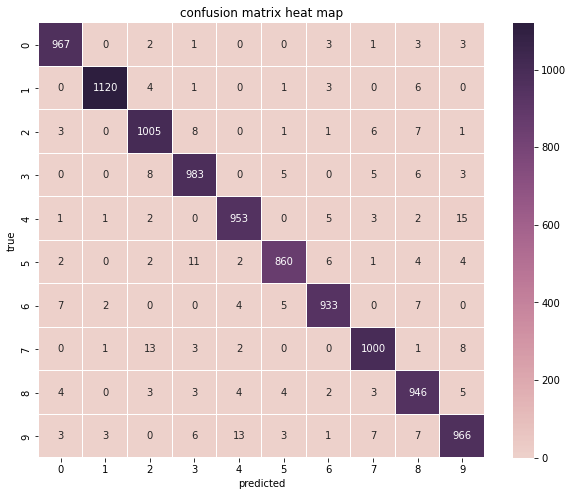

In [ ]:
# Make the confusion matrix
confusion_plot(y_true,y_pred)

In [ ]:
generate_classification_report(y_true,y_pred)

,Label,f1-score,precision,recall,support
0,0,0.983223,0.986735,0.979737,987.0000
1,1,0.990274,0.986784,0.993789,1127.0000
2,2,0.970546,0.973837,0.967276,1039.0000
3,3,0.970385,0.973267,0.967520,1016.0000
4,4,0.972449,0.970468,0.974438,978.0000
5,5,0.971203,0.964126,0.978385,879.0000
6,6,0.975941,0.973904,0.977987,954.0000
7,7,0.973710,0.972763,0.974659,1026.0000
8,8,0.963831,0.971253,0.956522,989.0000
9,9,0.959285,0.957384,0.961194,1005.0000


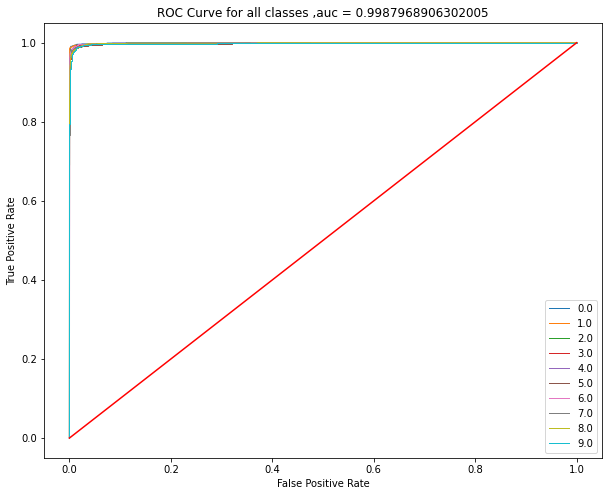

In [ ]:
plot_roc_curve_all(y_true, y_prob,10)